#### Import Necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Read 'car.jpg' with cv2

In [4]:
image = cv2.imread('car.jpg')

#### Display the image and Convert to RGB

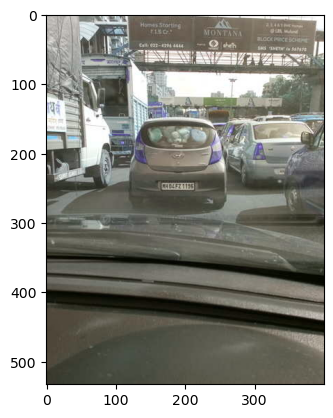

In [6]:
plt.imshow(image)

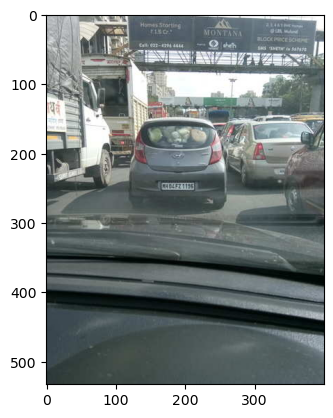

In [7]:
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### Load the 'haarcascade_russian_plate_number.xml' file.

In [9]:
plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')

In [10]:
def detect_plate(img): 
    plate_img = img.copy()  
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors = 4)     
    for (x,y,w,h) in plate_rects: 
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (0,0,255), 3)        
    return plate_img

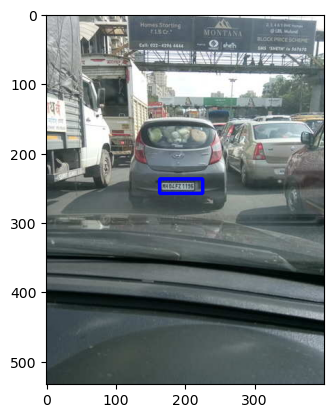

In [11]:
result = detect_plate(img)
plt.imshow(result)

#### Blur licence plate

In [13]:
def detect_and_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()  
    plate_rects = plate_cascade.detectMultiScale(plate_img, minNeighbors=4)    
    for (x,y,w,h) in plate_rects:         
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)        
        plate_img[y:y+h,x:x+w] = blurred_roi       
    return plate_img
    

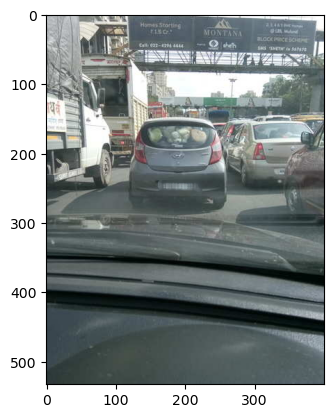

In [14]:
res = detect_and_blur_plate(img)
plt.imshow(res)